In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import feature_scoring, dimensional_stacking

current_dir = os.getcwd()  # Get current working directory
experiment_dir = os.path.join(current_dir, 'data', 'plots', 'Step1b')
print(experiment_dir)
os.makedirs(experiment_dir, exist_ok=True)  # Create the directory if it doesn't exist

C:\Users\jaspe\PycharmProjects\MBDM assignments\MBDM-project\final assignment\data\plots\Step1b


# Step 1b: Open Policy Exploration

## Introduction
In the previous notebook, we conducted an open exploration to understand the impacts of various uncertainties on key outcomes for Water Board 1 in Overijssel. This exploration included descriptive analysis, examining uncertainties with policies both enabled and disabled, and sensitivity analysis using Sobol sampling. These analyses provided valuable insights into the relationships between different variables, identified critical uncertainties, and assessed potential outcomes under various scenarios.

Building on these findings, this notebook will delve deeper into the effects of different policy levers on outcomes. We will perform a sensitivity analysis using feature scoring, combining both uncertainties and policies. This analysis will quantify the impact of various factors on the outcome variables, allowing us to identify which uncertainties and policy decisions have the largest influence on the results. By using methods such as feature scoring and Sobol sensitivity analysis, we aim to prioritize the most impactful interventions.

Following this, we will focus on the 10% highest values for expected deaths and damages, representing the most severe outcomes. Similar to the previous notebook, we will examine these extreme cases, but this time we will use Dimensional Stacking to also evaluate the impacts of policy levers alongside uncertainties. This approach will help us identify which levers and their specific settings are most likely to cause adverse outcomes.

By following this approach, we will provide Water Board 1 with actionable insights into which policies are most effective in managing flood risks in Dike Rings 4 and 5 and which are most critical in minimizing severe outcomes. This analysis will support informed decision-making for enhancing flood protection and safety measures.

### Notebook Structure
This notebook contains the following steps:

1. **Feature Scoring**: Assess the importance of different uncertainties and levers using feature scoring methods.
2. **Dimensional Stacking**: Understand the multidimensional interactions between uncertainties, levers and outcomes through dimensional stacking.

By following these steps, we aim to provide Water Board 1 with a comprehensive understanding of the potential impacts of potential policies and scenarios on the outcomes of interest, thereby aiding in informed decision-making for dike management and flood risk mitigation.

## Loading CSVs (Simulation Outputs)

Clean and load dataframes see Step 1 for explanation.

In [18]:
# Specify directory where CSVs are located
input_dir = os.path.join('data', 'output_data')

# Load the saved CSV files into variables
random_experiments_df = pd.read_csv(os.path.join(input_dir, 'random_experiments.csv'))
random_outcomes_df = pd.read_csv(os.path.join(input_dir, 'random_outcomes.csv'))

# Drop the 'Unnamed: 0' column from each DataFrame
random_experiments_df = random_experiments_df.drop(columns='Unnamed: 0')
random_outcomes_df = random_outcomes_df.drop(columns='Unnamed: 0')

# Replace underscores in variable names with spaces in column names for outcome DataFrame
random_outcomes_df.columns = random_outcomes_df.columns.str.replace('_', ' ')

# Split up outcomes DataFrames for better analysis later on
random_outcomes_combined = random_outcomes_df[['Combined Expected Annual Damage', 'Combined Dike Investment Costs',
       'Combined Expected Number of Deaths', 'policy']]
random_outcomes_separate = random_outcomes_df[['A.4 Expected Annual Damage', 'A.4 Dike Investment Costs',
       'A.4 Expected Number of Deaths', 'A.5 Expected Annual Damage',
       'A.5 Dike Investment Costs', 'A.5 Expected Number of Deaths', 'policy']]

# 1. Feature Scoring
In this section, we will apply feature scoring to both uncertainties and policy levers to determine which factors have the most significant impact on the outcomes of interest. By analyzing the combined influence of all uncertainties and policy levers, we aim to identify specific levers that may have adverse effects on the outcomes for Water Board 1. This analysis will help us understand if there are certain decisions, in the interest of other stakeholders, that could negatively affect the objectives of Water Board 1.

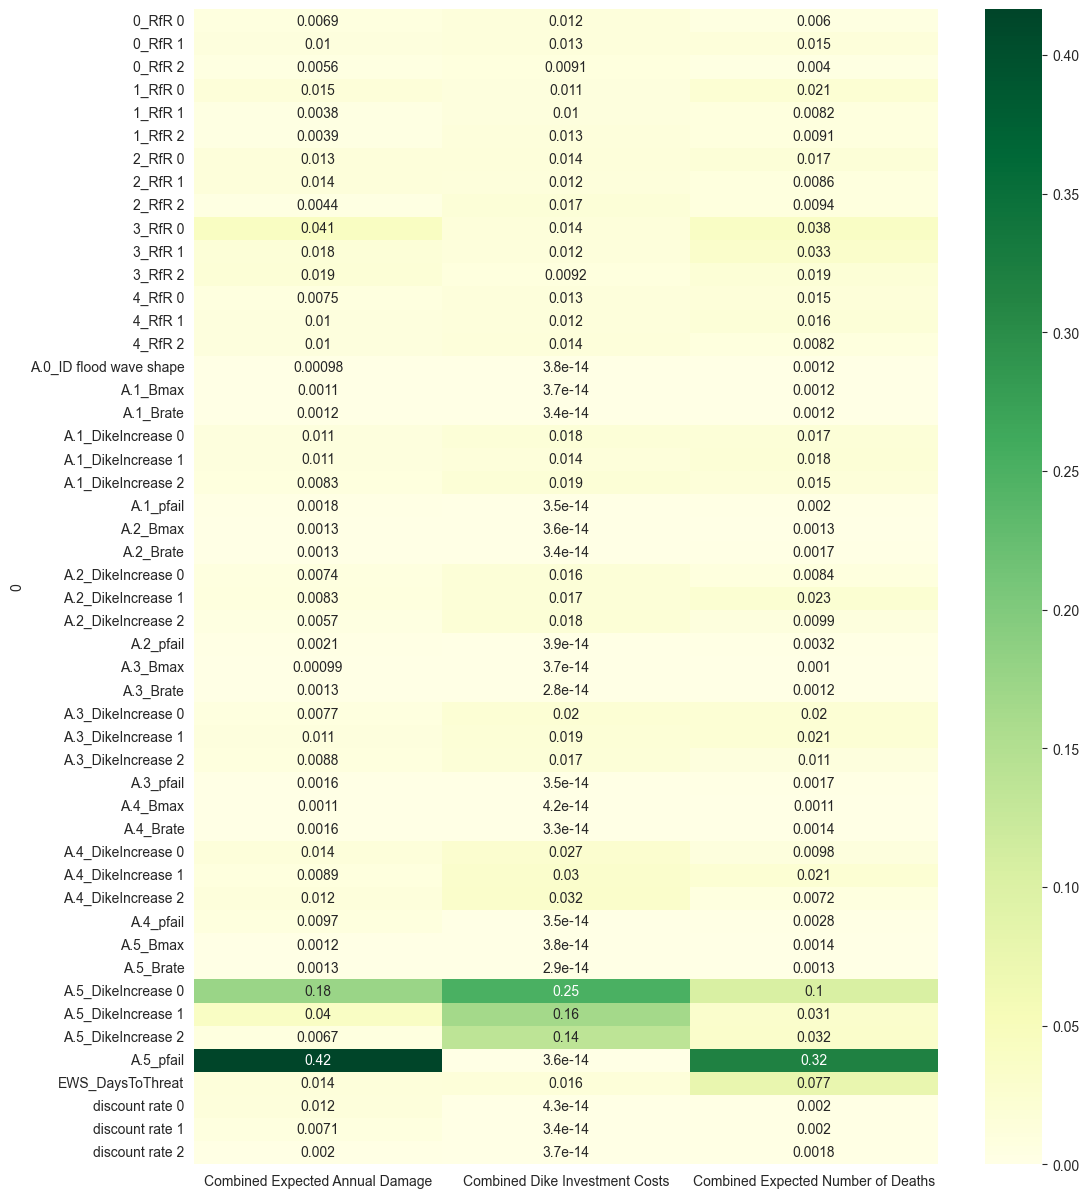

In [19]:
policies_and_uncertainties = random_experiments_df.iloc[:, :-3]

# Define the columns to be excluded from outcomes
columns_to_exclude = ['A.4 Dike Investment Costs', 'A.5 Dike Investment Costs', 'A.4 Expected Annual Damage', 'A.4 Expected Number of Deaths',
                      'A.5 Expected Annual Damage', 'A.5 Expected Number of Deaths', 'policy']

# Calculate feature scores using uncertainties and policies
feature_scores = feature_scoring.get_feature_scores_all(policies_and_uncertainties, random_outcomes_df.drop(columns=columns_to_exclude))

# Plot the feature scores
plt.figure(figsize=(12, 15))
sns.heatmap(feature_scores, cmap="YlGn", annot=True)

# Save the plot
os.makedirs(experiment_dir, exist_ok=True)
plot_name = "feature_scores_policies_and_uncertainties_200_policies"
plot_path = os.path.join(experiment_dir, f"{plot_name}.png")
plt.savefig(plot_path)

plt.show()

Based on the feature scores displayed in the heatmap above, the following conclusions can be drawn regarding the factors with the biggest impact on combined annual deaths and damages:

- **Probability of not failing in dike ring 5**: This factor stands out as having the most significant impact, explaining about 41% of the variance in annual damages and about 32% of the variance in expected deaths.
- **Dike increase in dike ring 5**: The increase in dike height in this dike ring accounts for approximately 17% of the variance in annual damages and 10% of the variance in expected deaths. The impact on damages is particularly pronounced in the first phase of dike increase.

Regarding investment costs, the most impactful factor is:

- **Dike increase in dike ring 5**: Increases in dike height in this dike ring, whether in phase 1, 2, or 3, significantly affect the combined dike investment costs. The first phase of dike increase is especially influential, explaining about 22% of the variance in investment costs.

This means that increasing the dike height in dike ring 5 significantly impacts investment, deaths, and damages, and these impacts are expected to be contrary. Specifically, enabling dike increases probably results in higher investment costs while simultaneously reducing the number of deaths and damages.

## 3.3. Dimensional Stacking
We will now apply dimensional stacking to identify the 10 percent worst outcomes for deaths and damages. The goal of this analysis is to uncover combinations of policy levers and uncertainties that lead to the most severe scenarios. By doing so, we aim to identify potential levers that, while possibly favorable to other stakeholders, may have adverse impacts on the key outcomes of interest for Water Board 1. This analysis will provide critical insights into how different factors contribute to worst-case scenarios, helping to identify 'no-go' policy lever settings for the Water Board.

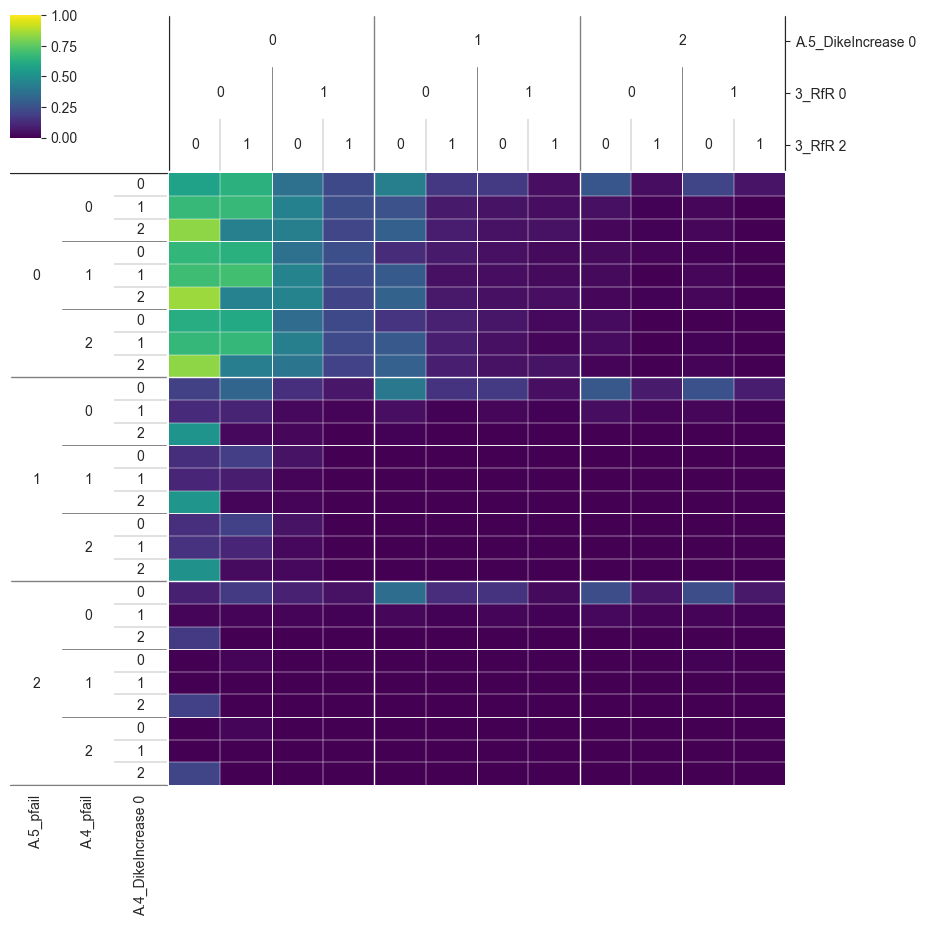

In [23]:
x_random_policy = policies_and_uncertainties
damage_random_policy = random_outcomes_df['Combined Expected Annual Damage'].values > np.percentile(random_outcomes_df['Combined Expected Annual Damage'], 90)

dimensional_stacking.create_pivot_plot(x_random_policy,damage_random_policy, nr_levels=3)

# Saving the plot to the plot
plot_name = "dimensional_stacking_annual_damage_200_policies_included"
plot_path = os.path.join(experiment_dir, f"{plot_name}.png")
plt.savefig(plot_path)

plt.show()

Based on the dimensional stacking plot displayed above, the following conclusions can be drawn about worst case damages:

- Low increase in dike height for dike ring 5, combined with a high probability of dike failure (low Pfail), leads to the worst outcomes for annual damages. This makes sense because the dikes are likelier to fail cause by both little heightening and a high probability of failure.
- In the case of no dike heightening in dike ring 5, a bigger increase of height in dike ring 4 shows an increasing probability of worst outcomes for deaths and damages in both dike rings 4 and 5. However, when dike heightening in dike ring 5 is increased, the effect 4 is inverted. Now more heightening leads to less worst case outcomes. This shows a combination of heightening in 4 and 5 seems to be best.
- Disabling the Room for the River policy in phases 1 and 3 for dike ring 4 often leads to worst-case scenarios, whereas enabling Room for the River in these phases results in better outcomes.

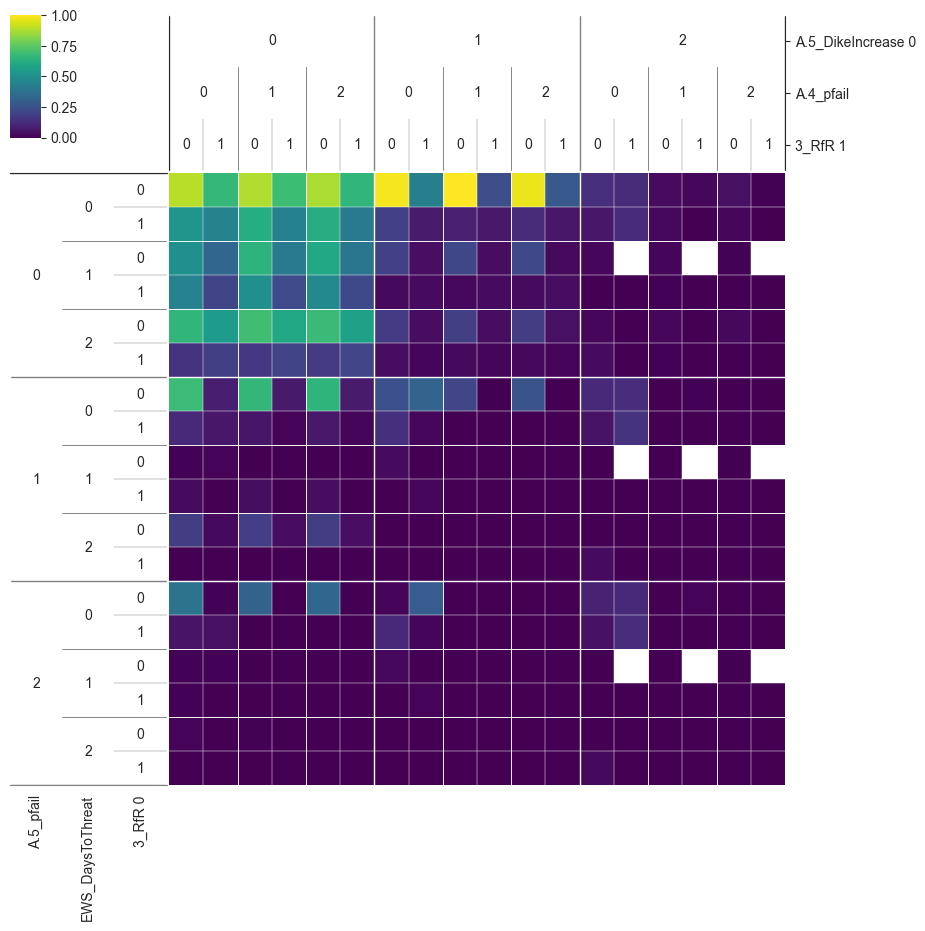

In [24]:
x_random_policy = policies_and_uncertainties
deaths_random_policy = random_outcomes_df['Combined Expected Number of Deaths'].values > np.percentile(random_outcomes_df['Combined Expected Number of Deaths'], 90)

dimensional_stacking.create_pivot_plot(x_random_policy,deaths_random_policy, nr_levels=3)

# Saving the plot to the plot
plot_name = "dimensional_stacking_deaths_200_policies"
plot_path = os.path.join(experiment_dir, f"{plot_name}.png")
plt.savefig(plot_path)

plt.show()

Based on the dimensional stacking plot displayed above, the following conclusions can be drawn about worst case deaths:

- We can see that decreases in the number of days Early Warning System days to threat, leads to worse outcomes. This makes sense as coming to action later will of course lead to worse outcomes.
- Low increase in dike height for dike ring 5, combined with a high probability of dike failure (low Pfail), leads to the worst outcomes for annual damages. This makes sense because the dikes are likelier to fail cause by both little heightening and a high probability of failure.
- Disabling the Room for the River policy in phases 1 and 2 for dike ring 4 often leads to worst-case scenarios, whereas enabling Room for the River in these phases results in better outcomes.

## Conclusion
The analysis reveals that the worst outcomes, in terms of damages and deaths, are predominantly influenced by policy levers within dike rings 4 and 5. There are generally no significant levers in the hands of other stakeholders that in the top 6 responsible for causing these worst outcomes.

This is beneficial for Water Board 1, as it is situated at the end of the river flow. Actions taken in dike rings 4 and 5 will not significantly affect dike rings 1, 2, and 3. Consequently, Water Boards 2 is not impacted by policies in dike rings 4 and 5, and Water Board 3 only partly. This leaves primarily the environmental agency, businesses, and Rijkswaterstaat to be concerned with the policy decisions made by Water Board 1.